# Análisis Exploratorio 

<hr>

In [1]:
!pip list


Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiohttp                       3.8.4
aiosignal                     1.3.1
alembic                       1.11.1
altair                        4.2.2
anyio                         3.6.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asgiref                       3.7.2
asttokens                     2.2.1
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         23.1.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.12.2
bleach                        6.0.0
blinker                       1.6.2
Brotli                        1.1.0
cached-property               1.5.2
cachetools                    5.3.0
category-encoders             2.6.0
certifi                       2023.7.22
cffi                          1.15.1
charset-normalizer            2.1.1
click     

### Importar las librerias y herramientas necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
%matplotlib inline

### Creación del DataFrame utilizando el CSV descargado

In [5]:
df = pd.read_csv("data/data_tesis.csv")
df

,Orden,Departamento,Municipio,semana,año,Grupo edad,Ciclo de vida,sexo_,area_,Barrio,...,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,MES
0,1,SANTANDER,BUCARAMANGA,23,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Transicion I-V,...,2,12/06/2015,1899-12-31T06:30:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,SERVICLINICOS DROMEDICA SA,SANTANDER,BUCARAMANGA,06. Junio
1,2,SANTANDER,BUCARAMANGA,5,2015,12 a 17,Adolescencia,Masculino,CABECERA MUNICIPAL,Betania,...,2,04/02/2015,1899-12-31T10:00:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,02. Febrero
2,3,SANTANDER,BUCARAMANGA,29,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,GIRON,...,2,21/07/2015,1899-12-31T08:00:00.000,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL UNIVERSITARIO DE SANTANDER,SANTANDER,BUCARAMANGA,07. Julio
3,4,SANTANDER,BUCARAMANGA,16,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Maria Paz,...,2,22/04/2015,1899-12-31T13:30:00.000,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,04. Abril
4,5,SANTANDER,BUCARAMANGA,44,2015,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Colorados,...,2,01/11/2015,1899-12-31T20:00:00.000,7.0,2,VIGILANCIA EN SALUD PÚBLICA DE LAS VIOLENCIAS ...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,11. Noviembre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12156,12157,SANTANDER,BUCARAMANGA,11,2023,7 a 11,Infancia,Masculino,CABECERA MUNICIPAL,SIN INFORMACION,...,2,14/03/2023,NaN,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...,HOSPITAL INTERNACIONAL DE COLOMBIA,SANTANDER,BUCARAMANGA,03. Marzo
12157,12158,SANTANDER,BUCARAMANGA,11,2023,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,Manzanares,...,2,17/03/2023,NaN,1.0,2,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...,RETROALIMENTACION,SANTANDER,BUCARAMANGA,03. Marzo
12158,12159,SANTANDER,BUCARAMANGA,11,2023,12 a 17,Adolescencia,Femenino,CABECERA MUNICIPAL,SIN INFORMACION,...,2,05/02/2023,NaN,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,03. Marzo
12159,12160,SANTANDER,BUCARAMANGA,12,2023,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,SIN INFORMACION,...,2,19/03/2023,NaN,2.0,2,VIGILANCIA EN SALUD PÚBLICA DE LA VIOLENCIA DE...,HOSPITAL LOCAL DEL NORTE,SANTANDER,BUCARAMANGA,03. Marzo


#### A continuación se utilizaron funciones disponibles del DataFrame para obtener información relevante sobre el mismo

In [6]:
df.dtypes

Orden                         int64
Departamento                 object
Municipio                    object
semana                        int64
año                           int64
Grupo edad                   object
Ciclo de vida                object
sexo_                        object
area_                        object
Barrio                       object
Comuna                       object
Tipo de Seguridad Social     object
pac_hos_                      int64
con_fin_                      int64
version                      object
naturaleza                  float64
def_naturaleza               object
actividad                     int64
nom_actividad                object
edad_agre                   float64
sexo_agre                    object
parentezco_vict              object
sust_vict                     int64
fec_hecho                    object
hora_hecho                   object
escenario                   float64
zona_conf                     int64
nom_eve                     

In [7]:
df['edad_agre'].value_counts()

0.0     4524
30.0     261
25.0     249
26.0     238
20.0     220
        ... 
88.0       1
8.0        1
79.0       1
95.0       1
69.0       1
Name: edad_agre, Length: 82, dtype: int64

<AxesSubplot: >

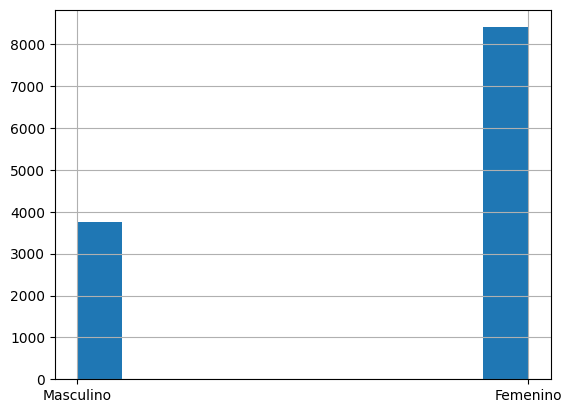

In [8]:
df['sexo_'].hist()

<AxesSubplot: >

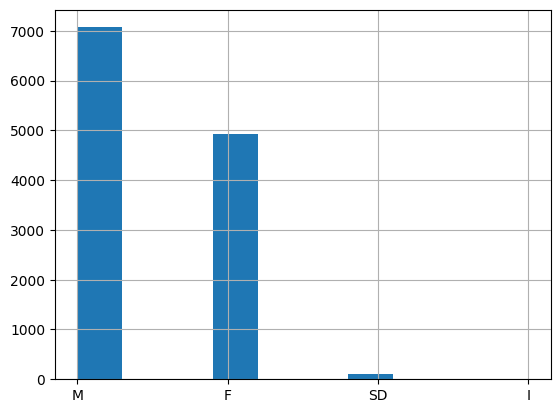

In [9]:
df['sexo_agre'].hist()

#### Por medio de `df.isnull().sum()` se obtienen el total de valores nulos existentes para cada columna del DataFrame

In [10]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                  2276
def_naturaleza                 0
actividad                      0
nom_actividad               7983
edad_agre                   2552
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      5
hora_hecho                  6497
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

#### Reemplazar valores nulos en la columna `naturaleza` segun la definición de la naturaleza 

In [11]:
for i in range(len(df)):
    if pd.isnull(df.iloc[i]["naturaleza"])==True :
        if df.iloc[i]["def_naturaleza"]=="Violencia fisica":
            df.loc[i,'naturaleza']=1
        if df.iloc[i]["def_naturaleza"]=="Violencia psicologica":
            df.loc[i,'naturaleza']=2
        if df.iloc[i]["def_naturaleza"]=="Negligencia y abandono":
            df.loc[i,'naturaleza']=3
        if df.iloc[i]["def_naturaleza"]=="Abuso sexual":
            df.loc[i,'naturaleza']=4
        if df.iloc[i]["def_naturaleza"]=="Acoso sexual":
            df.loc[i,'naturaleza']=5
        if df.iloc[i]["def_naturaleza"]=="Violacion":
            df.loc[i,'naturaleza']=6
        if df.iloc[i]["def_naturaleza"]=="Explotacion sexual, comercial niños, adolescentes":
            df.loc[i,'naturaleza']=7
        if df.iloc[i]["def_naturaleza"]=="Acceso carnal":
            df.loc[i,'naturaleza']=8
        if df.iloc[i]["def_naturaleza"]=="Otras violencias sexuales":
            df.loc[i,'naturaleza']=9
        if df.iloc[i]["def_naturaleza"]=="Actos sexuales":
            df.loc[i,'naturaleza']=10
        if df.iloc[i]["def_naturaleza"]=="Trata de personas":
            df.loc[i,'naturaleza']=11
        if df.iloc[i]["def_naturaleza"]=="Actos sexuales violencia":
            df.loc[i,'naturaleza']=12
        if df.iloc[i]["def_naturaleza"]=="Otros actos sexuales":
            df.loc[i,'naturaleza']=14
        if df.iloc[i]["def_naturaleza"]=="Sin informacion" or df.iloc[i]["def_naturaleza"]=="Sin Informacion":
            df.loc[i,'naturaleza']=99

In [12]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                     5
def_naturaleza                 0
actividad                      0
nom_actividad               7983
edad_agre                   2552
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      5
hora_hecho                  6497
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

#### Verificar cuantás filas tienen su `def_naturaleza` como "Sin información"

In [13]:
df[df["def_naturaleza"]=="Sin Informacion"].naturaleza

9885    99.0
9887    99.0
9888    99.0
9891    99.0
9897    99.0
9898    99.0
9900    99.0
9905    99.0
Name: naturaleza, dtype: float64

#### Se agrupan los registros que tienen como valor de `actividad` 30 y 32 ya que no cuentan con una descripción disponible y se los agrupa en 26 que corresponde a "Otros"

In [14]:
df.loc[(df['actividad'] == 30) | (df['actividad'] == 32), 'actividad'] = 26

#### Remplazar el nombre de la actividad segun la numeración de la actividad y agrupar en 'Otros' aquellas actividades sin nombre
#### Remplazar valores nuelos en la columna naturaleza segun la definicion de la naturaleza 

In [15]:
for i in range(len(df)):
    if pd.isnull(df.iloc[i]["nom_actividad"])==True :
        if df.iloc[i]["actividad"]==26:
            df.loc[i,'nom_actividad']="Otro"
        if df.iloc[i]["actividad"]==24:
            df.loc[i,'nom_actividad']="Estudiante"
        if df.iloc[i]["actividad"]==33:
            df.loc[i,'nom_actividad']="Ninguna"
        if df.iloc[i]["actividad"]==31:
            df.loc[i,'nom_actividad']="Persona dedicada al cuidado del hogar"
        if df.iloc[i]["actividad"]==28:
            df.loc[i,'nom_actividad']="Trabajadora domestica"
        if df.iloc[i]["actividad"]==29:
            df.loc[i,'nom_actividad']="Persona en situación de prostitución"
        if df.iloc[i]["actividad"]==16:
            df.loc[i,'nom_actividad']="Servidor publico"
        if df.iloc[i]["actividad"]==13:
            df.loc[i,'nom_actividad']="Líder cívico"
        if df.iloc[i]["actividad"]==8:
            df.loc[i,'nom_actividad']="Reciclador"
        if df.iloc[i]["actividad"]==15:
            df.loc[i,'nom_actividad']="Maestro"
        if df.iloc[i]["actividad"]==17:
            df.loc[i,'nom_actividad']="Fuerza publica"
        
        
        

In [16]:
seleccion = df[df['actividad'] == 30]

# Muestra solo las columnas 'actividad' y 'nom_actividad'
print(seleccion[['actividad', 'nom_actividad']])

Empty DataFrame
Columns: [actividad, nom_actividad]
Index: []


#### Verificamos nuevamente si existen valores nulos en `nom_actividad`

In [17]:
df.nom_actividad.isnull().sum()

0

In [18]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                     5
def_naturaleza                 0
actividad                      0
nom_actividad                  0
edad_agre                   2552
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      5
hora_hecho                  6497
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

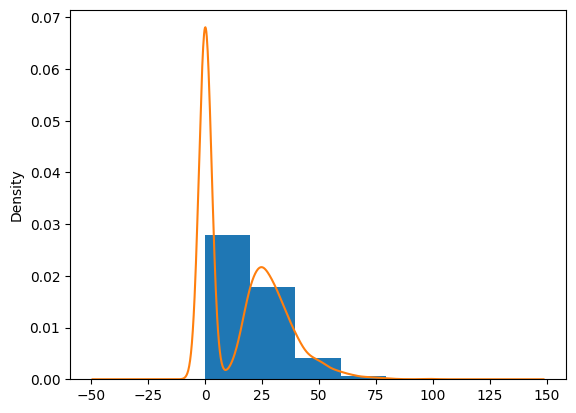

In [19]:
# Crear un gráfico de campana utilizando la función plot
df['edad_agre'].plot(kind='hist', density=True, bins=5)
df['edad_agre'].plot(kind='kde')

# Mostrar el gráfico
plt.show()

#### Se reemplazan los valores en nulo y 0 en la columna `edad_agre`

In [20]:
# Filtrar los valores diferentes de 0.0, NaN y menores a 10
valores_filt = df['edad_agre'][(df['edad_agre'].notnull()) & (df['edad_agre'] >= 10)]

# Calcular la proporción de cada valor filtrado
proporciones = valores_filt.value_counts(normalize=True)

# Generar una distribución de probabilidad basada en las proporciones
distribucion = proporciones / proporciones.sum()

# Reemplazar los valores 0.0, NaN y menores a 10 con nuevos valores basados en la distribución
df['edad_agre'] = df['edad_agre'].apply(
    lambda x: np.random.choice(proporciones.index, p=distribucion.values) if pd.isnull(x) or x == 0.0 or x < 10 else x
)

In [21]:
df.loc[4690]

Orden                                                                    4691
Departamento                                                        SANTANDER
Municipio                                                         BUCARAMANGA
semana                                                                     46
año                                                                      2021
Grupo edad                                                              0 a 6
Ciclo de vida                                                Primera infancia
sexo_                                                               Masculino
area_                                                      CABECERA MUNICIPAL
Barrio                                                            Cafe Madrid
Comuna                                                              01. NORTE
Tipo de Seguridad Social                                           Subsidiado
pac_hos_                                                        

In [22]:
df['edad_agre'] = round(df['edad_agre'])

In [35]:
df['edad_agre'].value_counts()

30.0    638
25.0    604
26.0    584
20.0    510
24.0    499
       ... 
75.0      3
95.0      3
83.0      1
80.0      1
69.0      1
Name: edad_agre, Length: 76, dtype: int64

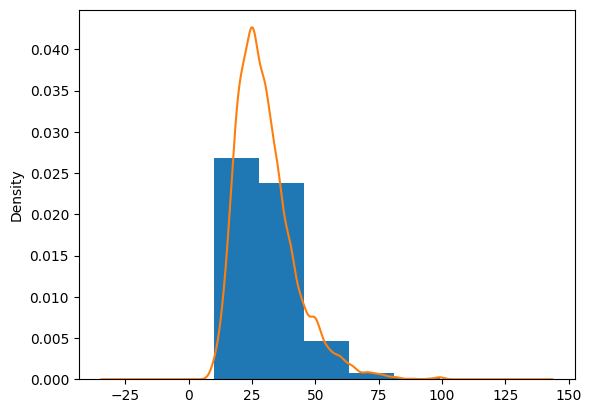

In [24]:
# Crear un gráfico de campana utilizando la función plot
df['edad_agre'].plot(kind='hist', density=True, bins=5)
df['edad_agre'].plot(kind='kde')

# Mostrar el gráfico
plt.show()

In [25]:
# Contar los valores NaN y los valores 0 en la columna 'edad_agre'
conteo_nan = df['edad_agre'].isnull().sum()
conteo_ceros = (df['edad_agre'] < 10).sum()

# Mostrar los resultados
print("Valores NaN:", conteo_nan)
print("Valores menores a 10:", conteo_ceros)# Filtrar los valores diferentes de 0.0, NaN y menores a 10

Valores NaN: 0
Valores menores a 10: 0


In [26]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                     5
def_naturaleza                 0
actividad                      0
nom_actividad                  0
edad_agre                      0
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      5
hora_hecho                  6497
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

#### Agrupación de variables

Respecto a la columna `naturaleza` se decidió agrupar algunos de sus valores y asociarlos al valor 4

Respecto a la columna `def_naturaleza` se decidió agrupar algunos de sus valores en un solo grupo denominado "Abuso Sexual"

In [27]:
abusos = ['Acoso sexual','Actos sexuales','Violacion','Acceso carnal','Actos sexuales violencia','Otras violencias sexuales','Otros actos sexuales']
df.loc[df['def_naturaleza'].isin(abusos), 
             'naturaleza'] = 4

In [28]:
df.loc[df['def_naturaleza'].isin(abusos), 
             'def_naturaleza'] = 'Abuso sexual'

In [29]:
ViolenciaFisicaOpsicologica = ['Violencia psicologica','Violencia fisica']
df.loc[df['def_naturaleza'].isin(ViolenciaFisicaOpsicologica ), 
             'naturaleza'] = 1

In [30]:
df.loc[df['def_naturaleza'].isin(ViolenciaFisicaOpsicologica), 
             'def_naturaleza'] = 'Violencia Fisica o Psicologica'

In [31]:
abusoSexual =['Abuso sexual']
df.loc[df['def_naturaleza'].isin(abusoSexual), 
             'naturaleza'] = 2

Respecto a la columna `fec_hecho` se decidió separar la fecha del hecho por trimestres

In [36]:
df['fec_hecho'] = pd.to_datetime(df['fec_hecho'], format='%d/%m/%Y')
df['trimestre'] = df['fec_hecho'].dt.quarter

In [37]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                     5
def_naturaleza                 0
actividad                      0
nom_actividad                  0
edad_agre                      0
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      5
hora_hecho                  6497
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

Respecto a la columna `naturaleza` se modificaron sus valores para que vayan de acuerdo al orden numérico

In [38]:
for i in range(len(df)):
    if df.iloc[i]["naturaleza"]==7:
        df.loc[i,'naturaleza']=5
    if df.iloc[i]["naturaleza"]==11:
        df.loc[i,'naturaleza']=6

- Se eliminaron las filas que tienen como `def_naturaleza` los valores de "Sin informacion", "Sin Informacion", "Explotacion sexual, comercial niños, adolescentes" o "Trata de personas"

In [39]:
indices=[]
for i in range(len(df)):
    if df.iloc[i]["def_naturaleza"] == "Sin informacion" or df.iloc[i]["def_naturaleza"] == "Sin Informacion" or df.iloc[i]["def_naturaleza"] == "Explotacion sexual, comercial niños, adolescentes" or df.iloc[i]["def_naturaleza"] == "Trata de personas" :
        indices.append(i)

In [40]:
df=df.drop(indices,axis=0)

In [41]:
df.isnull().sum()

Orden                          0
Departamento                   0
Municipio                      0
semana                         0
año                            0
Grupo edad                     0
Ciclo de vida                  0
sexo_                          0
area_                          0
Barrio                         0
Comuna                         0
Tipo de Seguridad Social       0
pac_hos_                       0
con_fin_                       0
version                        0
naturaleza                     5
def_naturaleza                 0
actividad                      0
nom_actividad                  0
edad_agre                      0
sexo_agre                     48
parentezco_vict                0
sust_vict                      0
fec_hecho                      4
hora_hecho                  6171
escenario                      3
zona_conf                      0
nom_eve                        0
nom_upgd                       0
ndep_resi                      0
nmun_resi 

In [42]:
df = df.reset_index(drop=True)

In [43]:
df.naturaleza.value_counts()

3.0    4729
1.0    4562
2.0    2223
Name: naturaleza, dtype: int64

In [44]:
df.def_naturaleza.value_counts()

Negligencia y abandono            4729
Violencia Fisica o Psicologica    4562
Abuso sexual                      2223
ERROR: #N/A                          5
Name: def_naturaleza, dtype: int64

Respecto a la columna `Departamento` y `Municipio` se decidió establecer aquellos valores diferentes a "SANTADER" en "Otros" para `Departamento` se establecieron aquellas filas con valores diferentes a "BUCARAMANGA" en "Otros" 

In [45]:
for i in range(len(df)):
    if df.iloc[i]["Departamento"] !="SANTANDER":
        df.loc[i,'Departamento']="Otros"
for i in range(len(df)):
    if df.iloc[i]["Municipio"] !="BUCARAMANGA":
        df.loc[i,'Municipio']="Otros"

En la columna `Comuna` se agrupo los valores que tenian menos cantidad de datos en el valor Otros

In [46]:
comunas = ['01. NORTE','02. NORORIENTAL','03. SAN FRANCISCO','04. OCCIDENTAL','05. GARCIA ROVIRA','10. PROVENZA','11. SUR','13. ORIENTAL','14. MORRORICO']
df.loc[~df['Comuna'].isin(comunas), 'Comuna'] = 'Otros'

En la columna `Escenario` se agrupo los valores que no tenian descripcion en 'Otros'

In [47]:
df.loc[df['escenario'] == 6, 'escenario'] = 7

En la columna `Tipo de Seguridad Social` se agrupo los valores que representaban lo mismo

In [48]:
df.loc[df['Tipo de Seguridad Social'] == 'subsidiado', 'Tipo de Seguridad Social'] = 'Subsidiado'

In [49]:
df.loc[df['Tipo de Seguridad Social'] == 'no asegurado', 'Tipo de Seguridad Social'] = 'No Asegurado' 
df.loc[df['Tipo de Seguridad Social'] == 'No asegurado', 'Tipo de Seguridad Social'] = 'No Asegurado'

En la columna `parentezco_vict` se agrupo los valores que tenian menos cantidad de datos en el valor Otros

In [50]:
parentezcos=['Madre','Pareja','Familiar','Padre','Ex pareja','Esposo','Compañero permanente','Novio(a)','Abuelo (a)','Hermano (a)']
df.loc[~df['parentezco_vict'].isin(parentezcos), 'parentezco_vict'] = 'Otros'

Se crear una variable denominada violencia_intrafamiliar apartir del parentezco del agresor y la victima

In [51]:
def es_violencia_intrafamiliar(parentesco):
    categorias_intrafamiliar = ["Madre", "Padre", "Familiar", "Pareja", "Ex pareja", "Esposo", "Compañero permanente", "Abuelo(a)"]
    return 1 if parentesco in categorias_intrafamiliar else 0

df['violencia_intrafamiliar'] = df['parentezco_vict'].apply(es_violencia_intrafamiliar)

En la columna `nomp_upgd` se agrupo los valores que tenian menos cantidad de datos en el valor Otros

In [52]:
noms_upgd=['HOSPITAL LOCAL DEL NORTE','HOSPITAL UNIVERSITARIO DE SANTANDER','CLINICA CHICAMOCHA SA','CLINICA MATERNO INFANTIL SAN LUIS SA','UIMIST','FUNDACION OFTALMOLOGICA DE SDER FOSCAL','LOS COMUNEROS HOSPITAL UNIVERSITARIO DE BUCARAMANG','SERVICLINICOS DROMEDICA SA','SEDE GONZALEZ VALENCIA','UNIVERSIDAD INDUSTRIAL DE SANTANDER- UIS']
df.loc[~df['nom_upgd'].isin(noms_upgd), 'nom_upgd'] = 'Otros'

#### Se eliminaron aquellas filas donde `sexo_agre` era "I" o "SD"

In [53]:
df = df[(df['sexo_agre'] != 'I') & (df['sexo_agre'] != 'SD')]

Se crean variables para identificar si la victima y el agresor son mayores de edad

In [54]:
def es_victima_menor_de_edad(grupo_edad):
    categorias_menor_de_edad = ["0 a 6", "12 a 17", "7 a 11"]
    return 1 if grupo_edad in categorias_menor_de_edad else 0


df['victima_menor_de_edad'] = df['Grupo edad'].apply(es_victima_menor_de_edad)

In [55]:

def es_agresor_menor_de_edad(edad_agre):
    edad_limite_menor_de_edad = 18
    return 1 if edad_agre < edad_limite_menor_de_edad else 0

df['agresor_menor_de_edad'] = df['edad_agre'].apply(es_agresor_menor_de_edad)


#### Se eliminaron aquellas columnas que no se consideraron relevantes o que tenian un gran porcentaje de valores nulos

In [56]:
df=df.drop(columns="Orden")
df=df.drop(columns="def_naturaleza")
df=df.drop(columns="nom_actividad")
df=df.drop(columns="ndep_resi")
df=df.drop(columns="nmun_resi")
df=df.drop(columns="fec_hecho")
df=df.drop(columns="zona_conf")
df=df.drop(columns="Barrio")
df=df.drop(columns="version")
df=df.drop(columns="hora_hecho")

In [57]:
df=df.dropna()

In [58]:
df=df.drop_duplicates()

#### Se renombró y se cambio de tipo de dato algunas variables

In [59]:
df = df.rename(columns={'Departamento': 'departamento', 'Municipio': 'municipio', 'Grupo edad': 'grupo_edad', 'sexo_': 'sexo', 'area_': 'area',
                        'Tipo de Seguridad Social': 'tipo_de_seguridad_social', 'pac_hos_': 'paciente_hospitalizado', 'con_fin_': 'condicion_final'
                        , 'MES': 'mes', 'Ciclo de vida': 'ciclo_de_vida', 'sust_vict':'sustancias_victima', 'Comuna':'comuna'
                       })

In [60]:
df['escenario'] = df['escenario'].astype(int)
df['trimestre'] = df['trimestre'].astype(int)
df['naturaleza'] = df['naturaleza'].astype(int)
df['violencia_intrafamiliar']=df['violencia_intrafamiliar'].astype(int)
df['victima_menor_de_edad']=df['victima_menor_de_edad'].astype(int)
df['agresor_menor_de_edad']=df['agresor_menor_de_edad'].astype(int)

In [61]:
df['semana'] = df['semana'].astype(str)
df['año'] = df['año'].astype(str)
df['paciente_hospitalizado'] = df['paciente_hospitalizado'].astype(str)
df['condicion_final'] = df['condicion_final'].astype(str)
df['actividad'] = df['actividad'].astype(str)
df['sustancias_victima'] = df['sustancias_victima'].astype(str)
df['escenario'] = df['escenario'].astype(str)
df['trimestre'] = df['trimestre'].astype(str)
df['violencia_intrafamiliar']=df['violencia_intrafamiliar'].astype(str)
df['victima_menor_de_edad']=df['victima_menor_de_edad'].astype(str)
df['agresor_menor_de_edad']=df['agresor_menor_de_edad'].astype(str)
df['naturaleza'] = df['naturaleza'].astype('category')

In [62]:
columnas_categoricas = ["mes","nom_upgd","nom_eve","sexo_agre","parentezco_vict","departamento","municipio","grupo_edad","ciclo_de_vida","sexo","area","comuna","tipo_de_seguridad_social","semana", "año", "paciente_hospitalizado", "condicion_final", "actividad","sustancias_victima", "escenario","trimestre","naturaleza","violencia_intrafamiliar","victima_menor_de_edad","agresor_menor_de_edad"]
columnas_numericas=["edad_agre"]

df[columnas_categoricas] = df[columnas_categoricas].astype("category")
df[columnas_numericas] = df[columnas_numericas].astype(int)


#### Se modificaron los valores de `naturaleza` para que partan de 0. Ya que era necesario para el modelo escogido (XGBoost)

In [63]:
mapping = {1: 0, 2: 1, 3: 2, }
df['naturaleza'] = df['naturaleza'].map(mapping)
df['naturaleza']

0        2
1        0
2        2
3        0
4        1
        ..
11514    2
11515    0
11516    1
11517    0
11518    0
Name: naturaleza, Length: 11329, dtype: category
Categories (3, int64): [0, 1, 2]

#### Se crea un informe utilizando ProfileReport de la libreria ydata_profiling

In [64]:
from ydata_profiling import ProfileReport
tesis = ProfileReport(df, title="Tesis")

In [65]:
tesis.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Se genera el archivo .csv con los datos depurados

In [ ]:
df.to_csv("data/data_tesis_depurado.csv", index=False)

#### Se genera el archivo .pkl con los datos depurados

In [ ]:
df.to_pickle("data/data.pkl")

#### Finalmente se realiza la descripcion de las columnas disponibles para los nuevos datos depurados

```
Departamento: Nombre del departamento de procedencia de la víctima.
Municipio: Nombre del municipio de procedencia de la víctima.
Semana: Semana epidemiológica en la que ocurrió el evento según calendario vigente.
Año: Año correspondiente a la semana epidemiológica.
Grupo_edad: Rango de edades al que pertenece la víctima.
Ciclo_de_vida: Es la clasificacion de la edad del Paciente  según el ministerio de salud y proteccion social: 00. NO REPORTA, 01. Primera infancia, 02. Infancia, 03. Adolescencia, 04. Jovenes, 05. Adultez, 06. Persona Mayor.
Sexo: Son las caracteristicas fisiologicas del Paciente y son: MASCULINO, FEMENINO, Sin información.
Area: Valor alfanumérico correspondiente al código del área donde ocurrió el evento (campo 25):
CABECERA MUNICIPAL(1); CENTRO POBLADO(2); RURAL DISPERSO(3)
Comuna:Nombre de la comuna
Tipo_de_seguridad_social: Subsidiado; Contributivo; Excepción; Especial; Indeterminado; No Afiliado; No Asegurado
Paciente_hospitalizado: 1. Sí;   2. No
Condicion_final: 0. Vivo;  1. Muerto;  2.No sabe-no responde
Naturaleza: 1.Violencia fisica o Psicologica 2. Abuso sexual 3.Negigencia y abandono
Actividad: 13 = "Líderes cívicos(as)"; 15 = "Maestros(as)"; 16 = "Servidor público(a)"; 17 = "Fuerza pública"; 24 = "Estudiante "; 26 = "Otro"; 28 = "Trabajadora doméstica"; 29 = "Persona en situación de prostitución"; 31 = "Persona dedicada al cuidado del hogar"; 33 = "Ninguna"; 8 = "Reciclador(a)"
Edad_agre:Edad del agresor 
Sexo_Agre: M. Masculino; F. Femenino
Sus_vic: Presencia de alcohol u otra sustancia en la Víctima 1. Sí;  2. No
Escenario:1. Vía pública;  2. Vivienda;  3. Establecimiento educativo;  4. Lugar de trabajo;  7. Otro;  8. Comercio y áreas de servicios (Tienda, centro comercial, etc);  9. Otros espacios abiertos (bosques, potreros, etc);  10. Lugares de esparcimiento con expendido de alcohol; 11. Institución de salud;  12. Área deportiva y recreativa
Nom_eve: Nombre del evento
Nom_upgd: Nombre de la unidad primaria generadora de datos
Mes: Mes en el que ocurrieron los actos de violencia
violencia_intrafamiliar: Indica si existe o no violencia intrefamiliar 1.Si 2.No
victima_menor_de_edad:Indica si la victima menor de edad 1.Si 2.No
agresor_menor_de_edad:Indica si el agresor es menor de edad 1.Si 2.No
parentezco_vict: Indica la relación familiar o personal del agresor con la víctima
```